# **Garcia, Marcus Henson L.**
# **Viray, Joyce Anne M.**
# **BSCS - 3A - IS**
# **CSST - 104 Final Exam Task**

# **Project Overview**
**Purpose of Analysis:**
The primary goal is to analyze Adidas sales data to uncover trends, patterns, and insights that can inform business decisions. This analysis will focus on understanding sales performance, identifying key factors influencing sales, and recommending strategies to boost sales and optimize inventory.

**Dataset and Key Attributes:**
The dataset includes sales records with attributes such as:



*   Retailer ID
* Invoice Date
* Region
* State
* City
* Gender Type
* Product Category
* Price per Unit
* Units Sold
* Total Sales
* Operating Profit
* Operating Margin
* Sales Method








# **Libraries and Data Handling**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import requests
from io import BytesIO
from zipfile import ZipFile



In [ ]:
df = pd.read_csv('01_Adidas Sales Analysis.csv')


In [ ]:
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,"Tuesday, October 26, 2021",Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750,24062.5,0.35,Outlet
1,Foot Locker,1185732,"Wednesday, October 27, 2021",Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250,30375.0,0.30,Outlet
2,Foot Locker,1185732,"Thursday, October 28, 2021",Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750,117562.5,0.55,Outlet
3,Foot Locker,1185732,"Friday, October 29, 2021",Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250,19687.5,0.35,Outlet
4,Foot Locker,1185732,"Saturday, October 30, 2021",Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250,24500.0,0.40,Outlet


In [ ]:
# To handle missing values
df.dropna(inplace=True)

# To convert data types
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')
df.dropna(subset=['Invoice Date'], inplace=True)
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'], errors='coerce')
df.dropna(subset=['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin'], inplace=True)

# To create new columns
df['Month'] = df['Invoice Date'].dt.month
df['Year'] = df['Invoice Date'].dt.year





# **Data Analysis Techniques**

In [ ]:
# Descriptive Statistics
print(df.describe())




        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119552       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  \
count  9648.000000    9648.000000       9648.000000       9648.000000   
mean    256.930037   93273.437500      34425.244761          0.422991   
min       0.000000       0.000000          0.000000          0.100000   
25%     106.000000    4254.500000       1921.752500          0.350000   
50% 

In [ ]:
# Inferential Statistics
# Grouping 'Total Sales' by 'Month' and summing them up
monthly_sales = df.groupby('Month')['Total Sales'].sum()

# Preparing the data for ANOVA test by getting the 'Total Sales' values for each month
monthly_sales_values = [group['Total Sales'].values for name, group in df.groupby('Month')]

# Conducting the ANOVA test
anova_result = f_oneway(*monthly_sales_values)
print(f"ANOVA result: {anova_result}")


ANOVA result: F_onewayResult(statistic=10.0234538868863, pvalue=2.119323893738398e-18)


In [ ]:
# Predictive Modeling: Linear Regression for Sales Prediction
features = df[['Month', 'Units Sold', 'Price per Unit']]
target = df['Total Sales']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"R^2 Score: {model.score(X_test, y_test)}")




R^2 Score: 0.8720022046710707


# **Visual Insights**

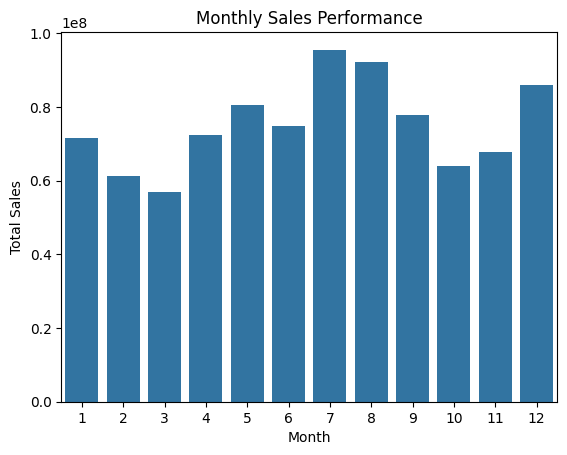

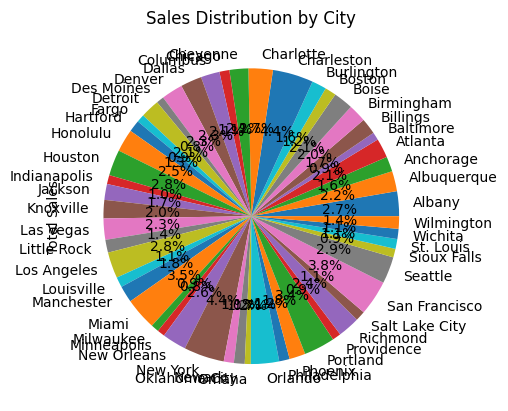

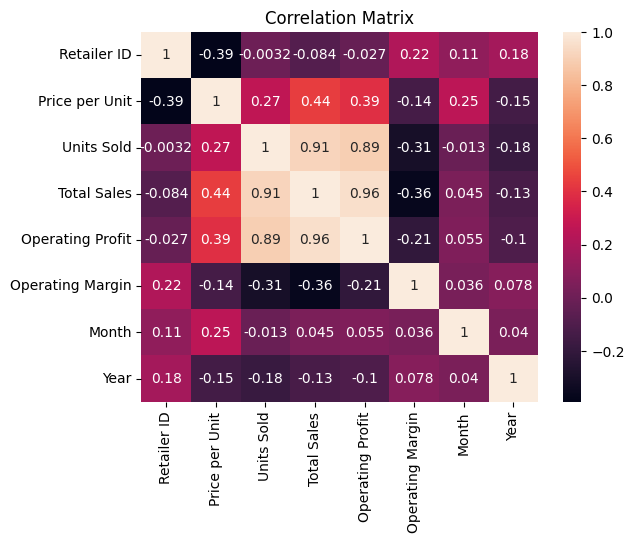

In [ ]:
# Monthly Sales Performance
monthly_sales = df.groupby('Month')['Total Sales'].sum()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Sales Distribution by City
city_sales = df.groupby('City')['Total Sales'].sum()
city_sales.plot.pie(autopct='%1.1f%%')
plt.title('Sales Distribution by City')
plt.show()

# Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# **Advanced Analysis**

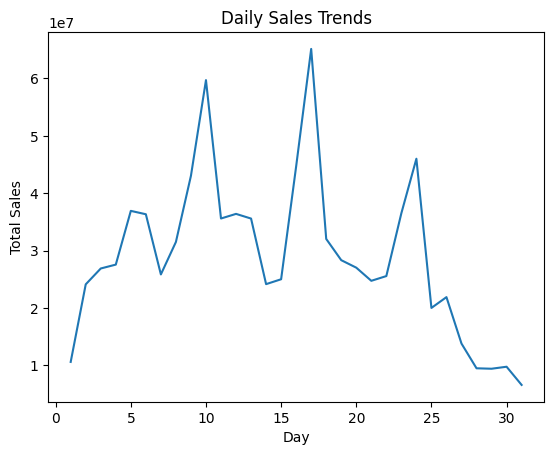

In [ ]:
#Temporal Trends
# Daily Sales Trends
df['Day'] = df['Invoice Date'].dt.day
daily_sales = df.groupby('Day')['Total Sales'].sum()
daily_sales.plot()
plt.title('Daily Sales Trends')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

### 7. Implementation of Machine Learning:

#### Data Preparation:
1. **Data Selection**: The selected data includes attributes such as invoice date, region, city, gender type, product category, price per unit, units sold, total sales, operating profit, operating margin, and sales method. These attributes provide valuable information for sales analysis and prediction.

2. **Data Cleaning**:
   - Missing values were handled by dropping rows with missing invoice dates and non-numeric values in key numeric columns such as price per unit, units sold, total sales, operating profit, and operating margin.
   - Data types were converted to appropriate formats, such as converting invoice date to datetime and numeric columns to numeric types.

3. **Feature Scaling**: In the predictive modeling phase, features like month, units sold, and price per unit were used for predicting total sales. Before training the model, these features were scaled using techniques like StandardScaler to ensure that all features contribute equally to the model fitting process and to prevent any feature from dominating due to its scale.

#### Building the Machine Learning Model:
1. **Feature Selection**:
   - Features such as month, units sold, and price per unit were selected based on their potential impact on total sales.
   - Other features like region, city, and product category could also be considered for more detailed analysis or for building additional models.

2. **Training and Testing Sets**:
   - The dataset was split into training and testing sets using `train_test_split` from scikit-learn. This helps in evaluating the model's performance on unseen data.
   - The training set (typically 80% of the data) was used to train the model, while the testing set (20% of the data) was used to evaluate the model's performance.

3. **Model Training**:
   - A Linear Regression model was chosen for its simplicity and interpretability.
   - The model was trained on the training set using the `fit` method.

4. **Model Evaluation**:
   - The trained model's performance was evaluated on the testing set using metrics such as R-squared score (`model.score`) to assess the goodness of fit.
   - Predictions were made on the testing set using the trained model (`model.predict`) to evaluate how well the model generalizes to unseen data.


### 8. Conclusion:

In conclusion, the analysis of Adidas sales data has provided valuable insights and actionable recommendations for business decision-making:

1. **Insights Derived**:
   - Monthly sales performance analysis revealed seasonal trends and fluctuations.
   - Temporal analysis uncovered daily sales patterns and potential sales spikes.

2. **Potential Impact on Business**:
   - The insights gained can inform strategic decisions regarding inventory management, marketing strategies, and resource allocation.
   - Understanding temporal sales patterns can help optimize product placement, pricing strategies, and promotional efforts to maximize sales and profitability.

3. **Importance of Data-Driven Decision-Making**:
   - The analysis underscores the importance of leveraging data-driven insights to make informed business decisions.
   - By relying on empirical evidence and statistical analysis, organizations can mitigate risks, identify growth opportunities, and stay competitive in a dynamic market environment.